In [1]:
import os
import inspect
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import torch
import scanpy as sc
import tqdm
import sys
import pickle
import PyComplexHeatmap as pch
import scvi
import IPython
import pandas as pd

sc.settings.figdir=os.path.expanduser('~/WbFigures/RegionalClocks')
sc._settings.settings._vector_friendly=True

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

if torch.cuda.is_available():
    print("GPU is available")
    print("Number of GPUs:", torch.cuda.device_count())
    print("GPU Name:", torch.cuda.get_device_name(0))
else:
    print("GPU is not available")

sys.path.append('/home/matthew.schmitz/utils/mts-utils/')
from genomics import sc_analysis


import antipode
from antipode.antipode_model import *
import antipode.model_functions
from antipode.model_functions import *
import antipode.model_distributions
from antipode.model_distributions import *
import antipode.model_modules
from antipode.model_modules import *
import antipode.train_utils
from antipode.train_utils import *
import antipode.plotting
from antipode.plotting import *


/home/matthew.schmitz/Matthew/utils/miniforge3/envs/rapids-24.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GPU is not available


In [2]:
batch_key='batch_name'
discov_key='species'
layer_key='UMIs'
leaf_key='level_2'
MDE_KEY = "X_antipode_UMAP"
anndata.settings.allow_write_nullable_strings = True

model_tag = '1.9.1.8.5_Dev_final_noQ_INP_moredim_regionsample'
model_path='/home/matthew.schmitz/Matthew/models/'+model_tag
adata = sc.read_h5ad(os.path.join(model_path,'analysis_inprogress.h5ad'))
antipode_model=antipode.antipode_model.ANTIPODE.load(model_path,adata=adata,prefix='p4_',device=device)
adata=antipode_model.adata_manager.adata
pstore = adata.uns['param_store']

INFO     Generating sequential column names                                                                        


/home/matthew.schmitz/Matthew/utils/miniforge3/envs/rapids-24.12/lib/python3.12/site-packages/pyro/params/param_store.py:334: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  s

antipode_mini$$$zl_encoder.fc.0.weight not deleted
antipode_mini$$$zl_encoder.fc.2.weight not deleted
antipode_mini$$$zl_encoder.fc.2.bias not deleted
antipode_mini$$$zl_encoder.fc.4.weight not deleted
antipode_mini$$$zl_encoder.fc.6.weight not deleted
antipode_mini$$$zl_encoder.fc.6.bias not deleted
antipode_mini$$$zl_encoder.fc.8.weight not deleted
antipode_mini$$$zl_encoder.fc.10.weight not deleted
antipode_mini$$$zl_encoder.fc.10.bias not deleted
antipode_mini$$$zl_encoder.fc.12.weight not deleted
antipode_mini$$$zl_encoder.fc.14.weight not deleted
antipode_mini$$$zl_encoder.fc.14.bias not deleted
antipode_mini$$$zl_encoder.fc.16.weight not deleted
antipode_mini$$$zl_encoder.fc.18.weight not deleted
antipode_mini$$$zl_encoder.fc.18.bias not deleted
antipode_mini$$$classifier.fc.0.weight not deleted
antipode_mini$$$classifier.fc.1.weight not deleted
antipode_mini$$$classifier.fc.1.bias not deleted
antipode_mini$$$classifier.fc.3.weight not deleted
antipode_mini$$$classifier.fc.4.wei

In [21]:
new_annos = pd.read_csv('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/data/taxtest/annotations/review_annotation.csv',index_col=0,skiprows=2)
adata.obs['new_ccl'] = new_annos['new_ccl']
adata.obs['new_neighborhood'] = new_annos['new_neighborhood']
adata.obs['ccl_extended']=adata.obs[leaf_key].replace(adata.obs.groupby(leaf_key)['new_ccl'].value_counts().unstack().idxmax(1).to_dict())
adata.obs['new_neighborhood_extended']=adata.obs[leaf_key].replace(adata.obs.groupby(leaf_key)['new_neighborhood'].value_counts().unstack().idxmax(1).to_dict())

/scratch/fast/44744/ipykernel_178460/4240727373.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs['ccl_extended']=adata.obs[leaf_key].replace(adata.obs.groupby(leaf_key)['new_ccl'].value_counts().unstack().idxmax(1).to_dict())
/scratch/fast/44744/ipykernel_178460/4240727373.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['ccl_extended']=adata.obs[leaf_key].replace(adata.obs.groupby(leaf_key)['new_ccl'].value_counts().unstack().idxmax(1).to_dict())
/scratch/fast/44744/ipykernel_178460/4240727373.py:4: FutureWarning: The default of observed=False is deprecated an

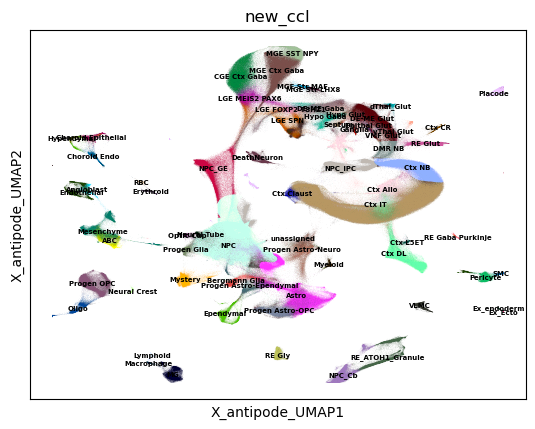

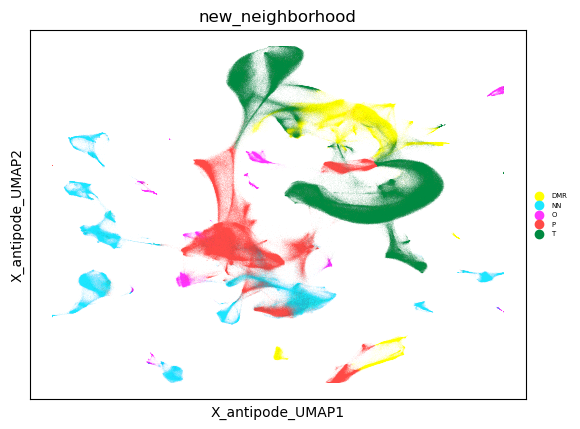

In [5]:
sc.pl.embedding(
    adata,
    basis=MDE_KEY,
    legend_loc='on data',palette=sc.pl.palettes.godsnot_102,legend_fontsize=5,
    color=['new_ccl']
)

sc.pl.embedding(
    adata,
    basis=MDE_KEY,
    palette=sc.pl.palettes.godsnot_102,legend_fontsize=5,
    color=['new_neighborhood']
)


<Axes: xlabel='ccl_extended'>

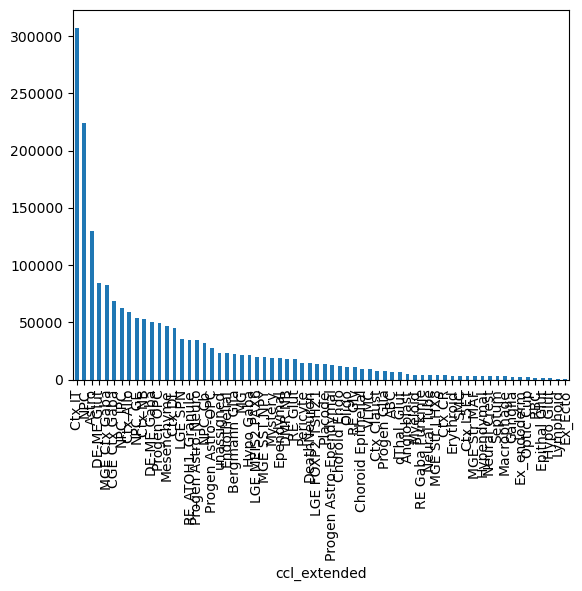

In [6]:
adata.obs['ccl_extended'].value_counts().plot.bar()

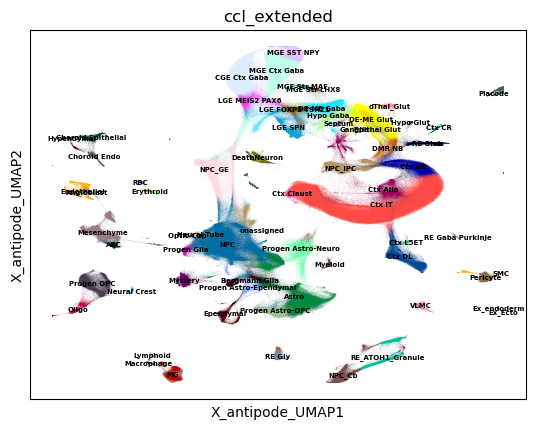

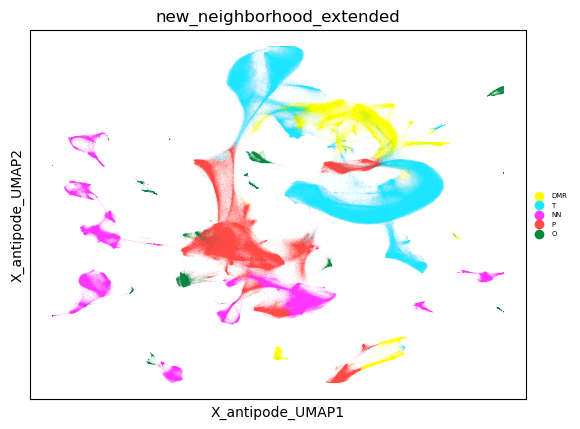

In [22]:
sc.pl.embedding(
    adata,
    basis=MDE_KEY,
    legend_loc='on data',palette=sc.pl.palettes.godsnot_102,legend_fontsize=5,
    color=['ccl_extended']
)

sc.pl.embedding(
    adata,
    basis=MDE_KEY,
    palette=sc.pl.palettes.godsnot_102,legend_fontsize=5,
    color=['new_neighborhood_extended']
)


In [35]:
neurect_lineage = adata.obs['new_neighborhood_extended'].isin(['P','T','DMR'])|adata.obs['ccl_extended'].isin(['Astro','Oligo','Progen OPC','Ependymal','Progen Astro-OPC','Progen Astro-Neuro','Hypendymal'])
dmr_cells = adata.obs['general_region'].isin(['de','hb','mb'])
adata.obs['DMR'] = dmr_cells
adata.obs['DMRl2'] = adata.obs['level_2'].replace((adata.obs.groupby('level_2')['DMR'].mean()>0.5).to_dict())
adata.obs['DMRall'] = (adata.obs['DMRl2'].astype(bool) & adata.obs['general_region'].isin(['h']))| adata.obs['DMR']

In [50]:
adata[adata.obs['DMRall'],:].write('/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/data/taxtest/HvQvM/HvQvMall_DMR.h5ad')

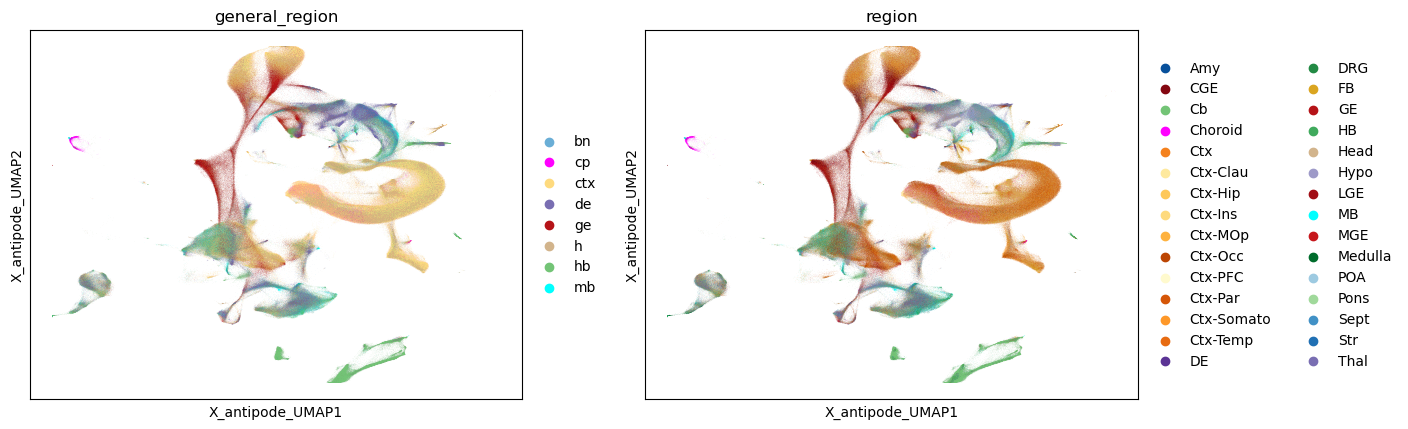

In [31]:
sc.pl.embedding(
    adata[neurect_lineage,:],
    basis=MDE_KEY,
    color=['general_region','region']
)

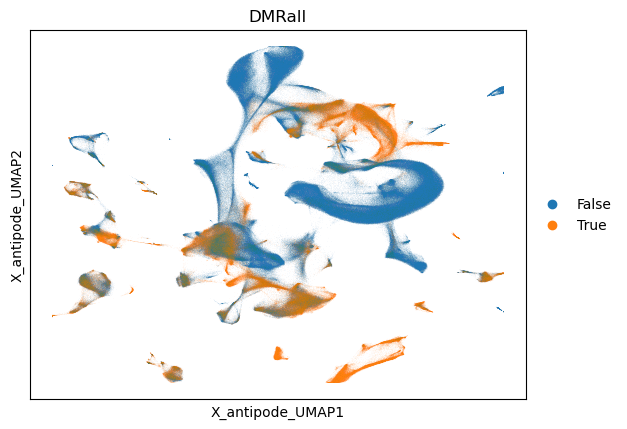

In [48]:
sc.pl.embedding(
    adata,
    basis=MDE_KEY,
    color=['DMRall']
)


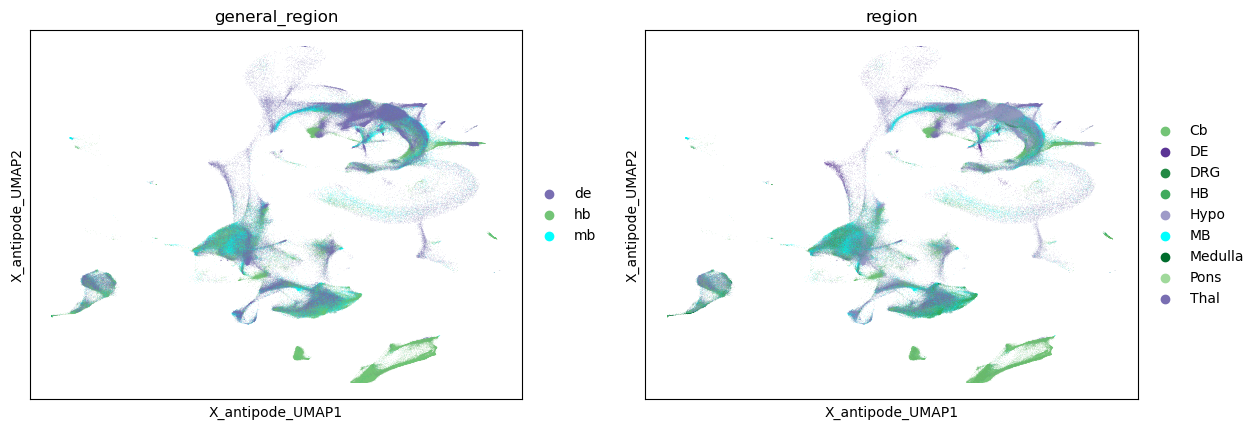

In [36]:
sc.pl.embedding(
    adata[neurect_lineage&dmr_cells,:],
    basis=MDE_KEY,
    color=['general_region','region']
)


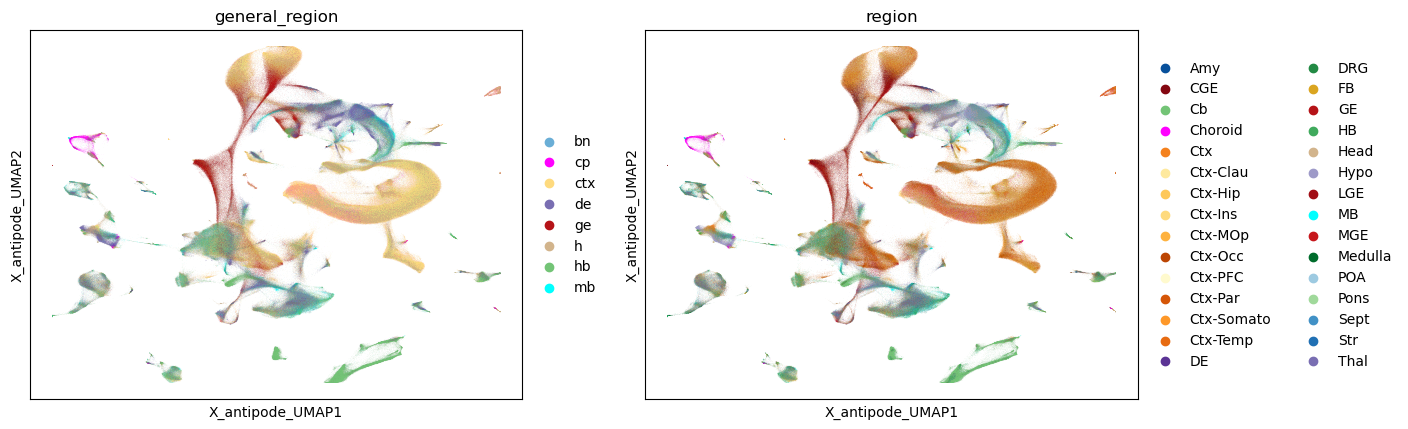

In [8]:
sc.pl.embedding(
    adata,
    basis=MDE_KEY,
    color=['general_region','region']
)


In [9]:
tsv_path = '/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Matthew/data/taxtest/gene_lists/MTS_neuropeptides_receptors.tsv'

# Read the TSV file
df = pd.read_csv(tsv_path, sep='\t')

nt_df = df.loc[df['gene_class'].isin(['Transporter','Synthesis','TF']),:]

In [10]:
from collections import defaultdict
gene_dict = defaultdict(list)
for _, row in nt_df.iterrows():
    # Here we assume 'hgnc_symbol' contains the gene symbol (e.g., SLC35D3, ENT1, etc.)
    gene = row['hgnc_symbol']
    # Split the type column by comma and strip extra whitespace.
    for nt in row['type'].split(','):
        nt = nt.strip()
        if nt:
            gene_dict[nt].append(gene)

gene_dict

defaultdict(list,
            {'UDP': ['SLC35D3'],
             'Adenosine': ['ENT1', 'ENT2', 'SLC29A3', 'SLC29A4'],
             'Glutamate': ['SLC17A6', 'SLC17A7', 'SLC17A8', 'SLC1A6'],
             'Acetylcholine': ['ACHE', 'CHAT', 'SLC5A7', 'SLC18A3'],
             'Histamine': ['HDC', 'SLC18A2'],
             'CO': ['HMOX1', 'HMOX2'],
             'NO': ['NOS1', 'NOS2', 'NOS3'],
             'Adrenaline': ['DBH',
              'DDC',
              'TH',
              'SLC18A1',
              'SLC18A2',
              'PNMT',
              'SLC12A7'],
             'Noradrenaline': ['DBH',
              'DDC',
              'TH',
              'SLC18A1',
              'SLC18A2',
              'SLC6A2',
              'SLC9B2',
              'SLC39A11'],
             'Dopamine': ['DDC', 'TH', 'SLC18A1', 'SLC18A2', 'SLC6A3'],
             'Serotonin': ['DDC',
              'SLC18A2',
              'TPH1',
              'TPH2',
              'SLC6A4',
              'FEV',
              '

In [11]:
scores = []
useful_nt = ['Proline','GABA','Serotonin','Dopamine','Histamine','NO','Adrenaline','Acetylcholine','Glutamate']
for nt, genes in gene_dict.items():
    print(nt)
    if nt in useful_nt:
        genes = [x for x in genes if x in adata.var.index]
        sc.tl.score_genes(adata, gene_list=genes, score_name=f'{nt}_score',            
                ctrl_as_ref=True,
                ctrl_size=50,
                gene_pool=None,
                n_bins=25,
                random_state=0,
                use_raw=False
        )
        scores.append(f'{nt}_score')


UDP
Adenosine
Glutamate
Acetylcholine
Histamine
CO
NO
Adrenaline
Noradrenaline
Dopamine
Serotonin
GABA
Glycine
Taurine
Proline
Creatine


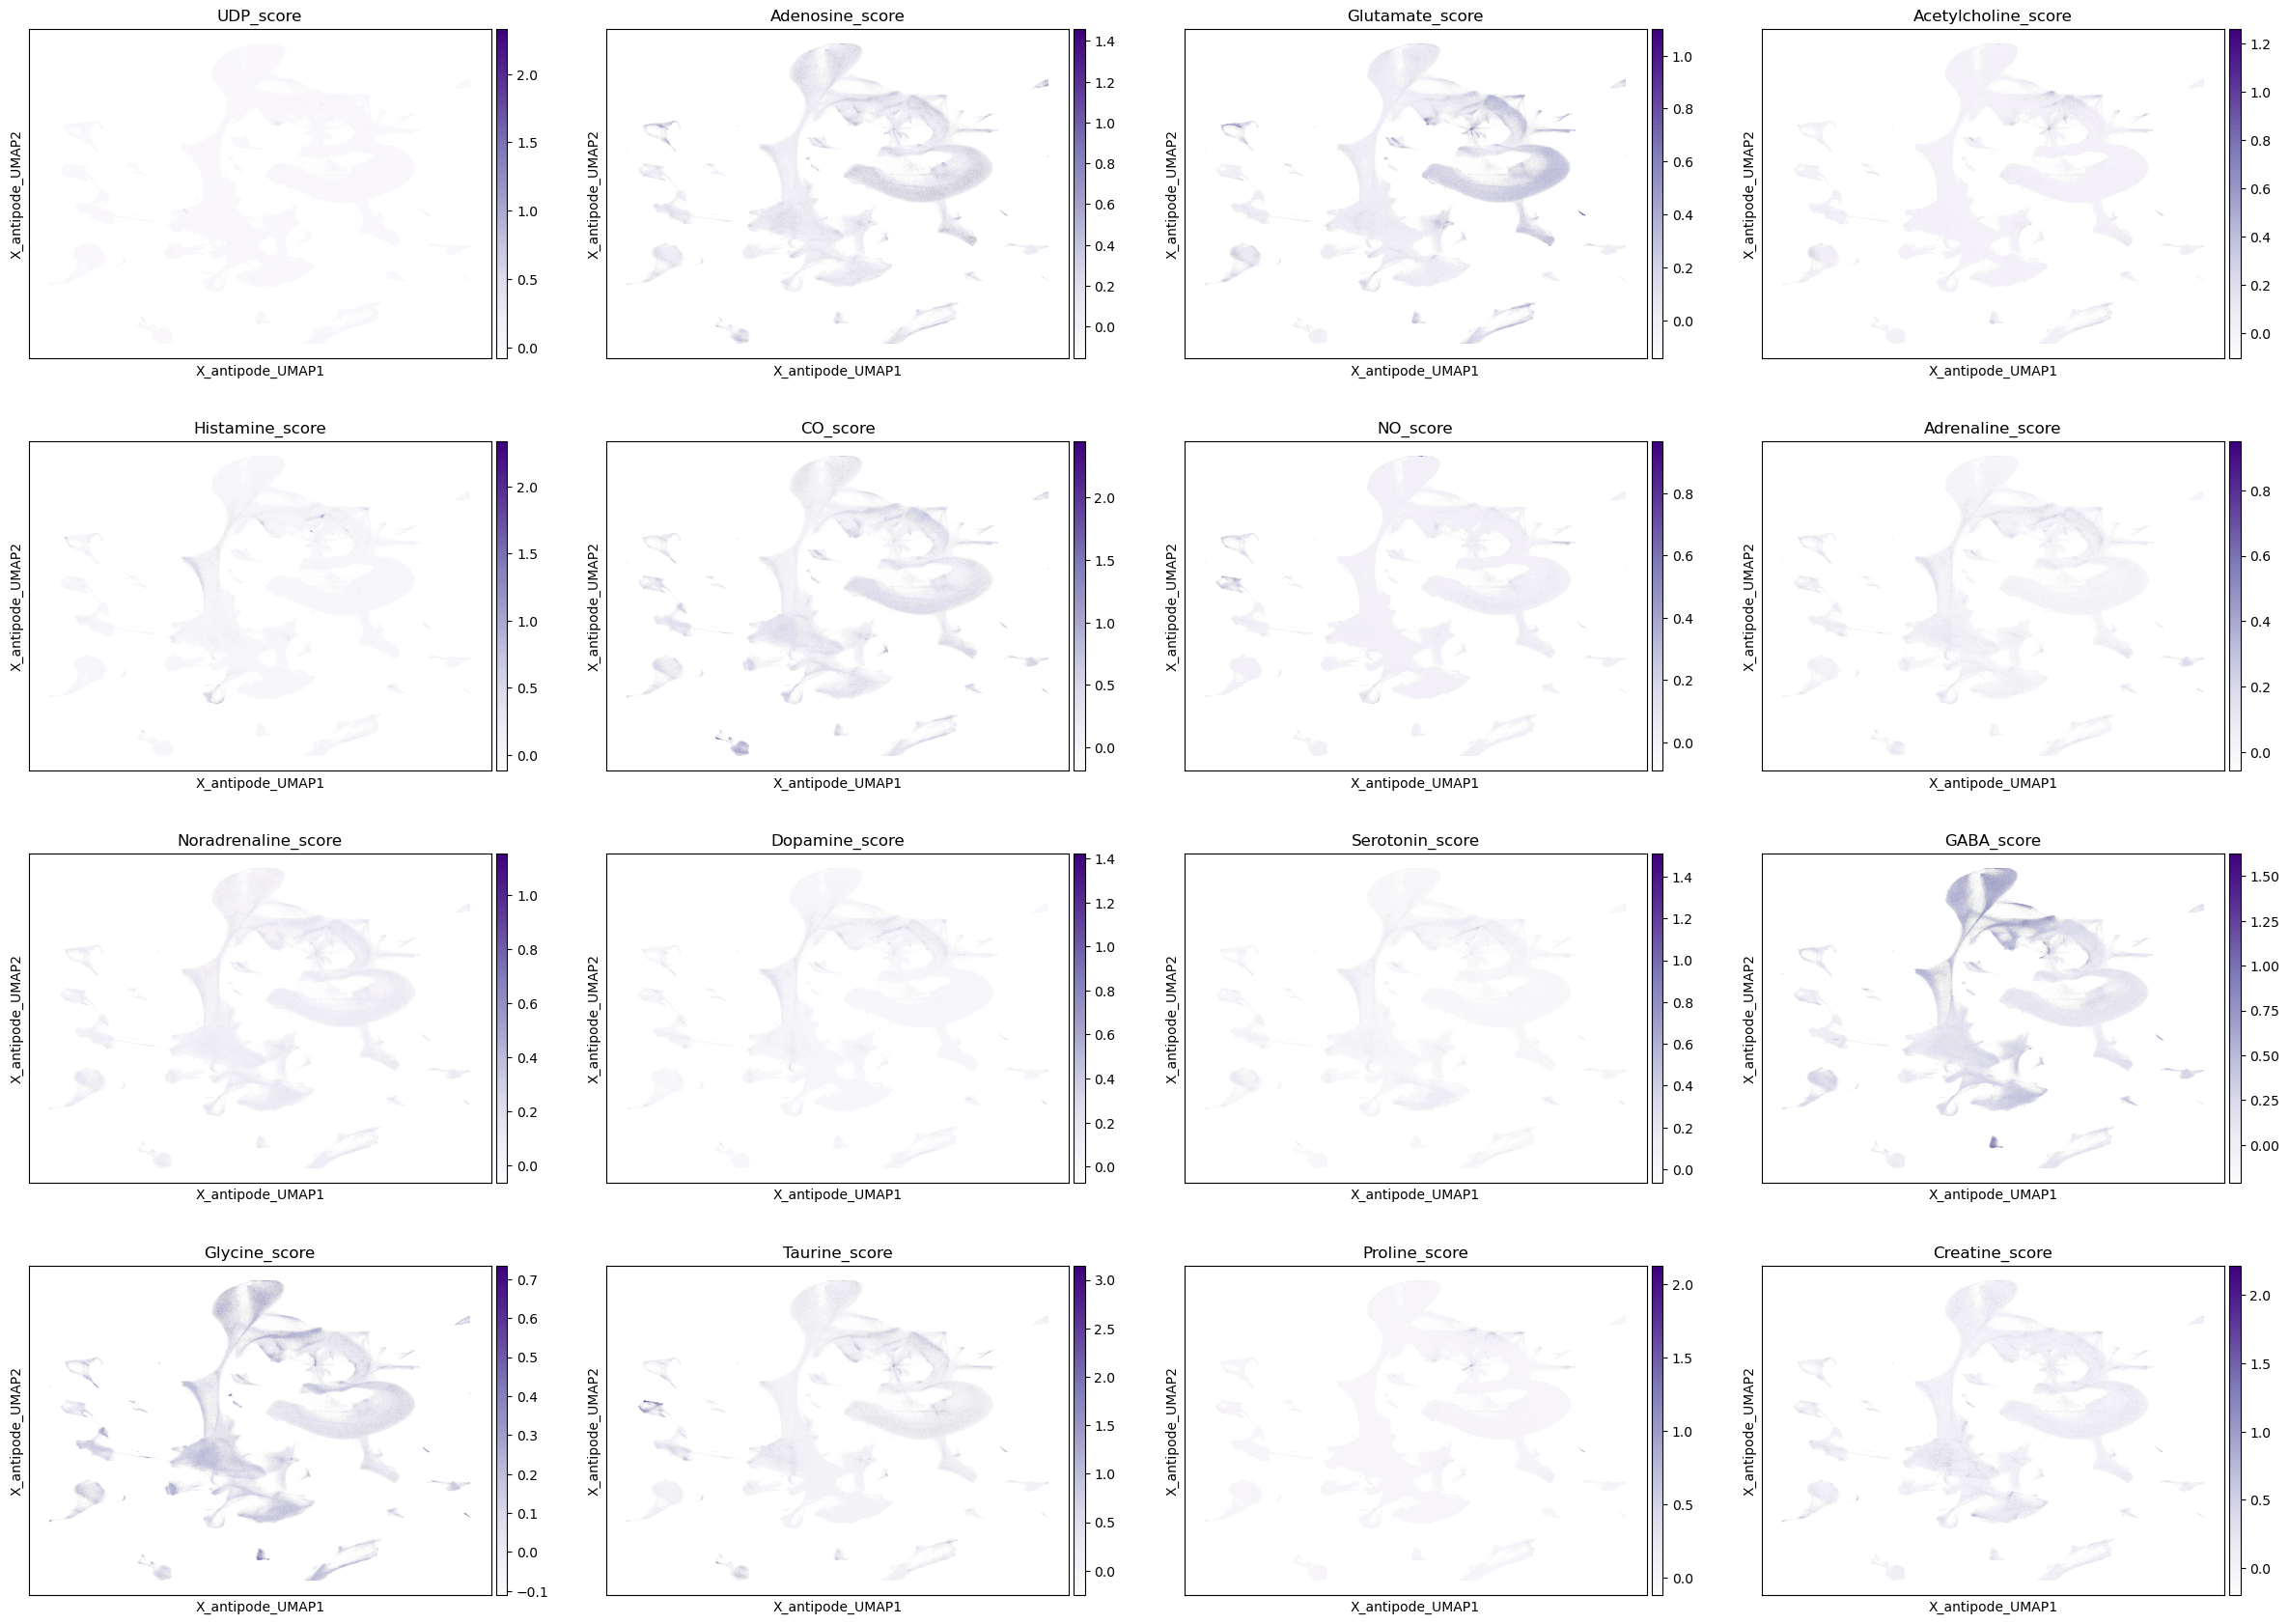

In [14]:
sc.pl.embedding(
    adata,
    basis=MDE_KEY,
    cmap='Purples',
    color=scores
)

/scratch/fast/44744/ipykernel_178460/3869340536.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seaborn.clustermap(adata.obs.groupby('level_2')[scores].mean()/adata.obs.groupby('level_2')[scores].mean().max(0),cmap='Purples')
/scratch/fast/44744/ipykernel_178460/3869340536.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seaborn.clustermap(adata.obs.groupby('level_2')[scores].mean()/adata.obs.groupby('level_2')[scores].mean().max(0),cmap='Purples')


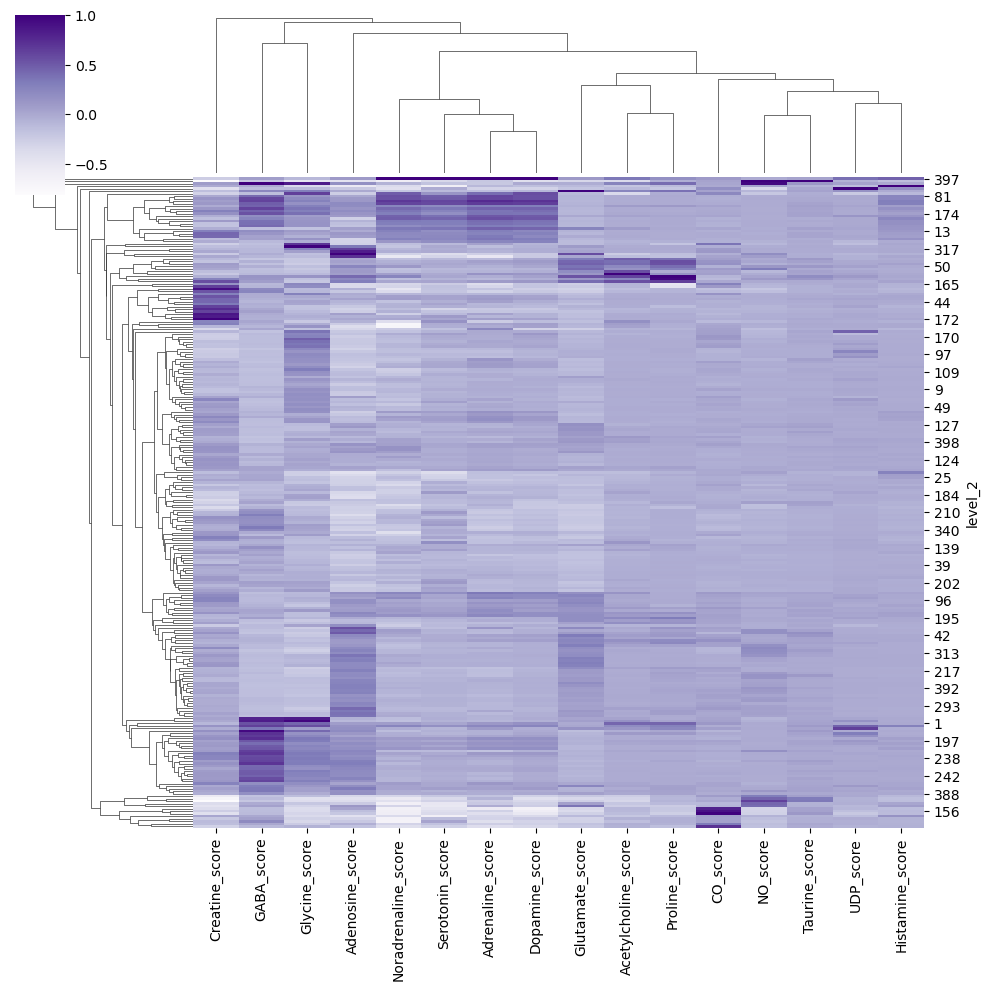

In [19]:
seaborn.clustermap(adata.obs.groupby('level_2')[scores].mean()/adata.obs.groupby('level_2')[scores].mean().max(0),cmap='Purples')

In [12]:
discov_cluster_params,cluster_params, cluster_labels,var_labels,(prop_taxon, prop_locs,prop_discov_di,prop_discov_dm)=antipode_model.calculate_cluster_params(flavor='numpy')
cluster_index = np.array([int(x) for x in cluster_labels])
discov_cluster_params = discov_cluster_params[:,cluster_index,:]
discov_labels=adata.obs[antipode_model.discov_key].cat.categories
latent_labels=[str(x) for x in range(pstore['discov_dc'].shape[1])]
n_clusters=antipode_model.level_sizes[-1]

In [13]:
adata.obs.

SyntaxError: invalid syntax (2858996123.py, line 1)

In [ ]:
sc.pl.embedding(
    adata,
    basis=MDE_KEY,
    color=['region']
)

In [ ]:
adata.obs['simplified_region'] = adata.obs['region'].astype(str)
adata.obs['simplified_region'] = adata.obs['simplified_region'].str.replace('Ctx-Hip','Hip')
adata.obs['simplified_region'] = adata.obs['simplified_region'].str.replace('-[A-Za-z]+','',regex=True)
adata.obs['simplified_region'] = adata.obs['simplified_region'].replace({'Hypo':'DE','Thal':'DE'})

In [ ]:
sc.pl.embedding(
    adata,
    basis=MDE_KEY,
    color=['simplified_region']
)

In [ ]:
adata.obs.groupby('simplified_region')['species'].value_counts().unstack()

In [ ]:
expected_region_ranks = {'Ctx':0,'CGE':1,'MGE':2,'Cb':3,'LGE':4,'DE':5,'Hip':6,'MB':7,'HB':8,'Medulla':9}
progen_data = adata[(adata.obs['neighborhood']=='P')&adata.obs['simplified_region'].isin(expected_region_ranks.keys()),:]
aggr_means = antipode.model_functions.group_aggr_anndata(progen_data,['species','simplified_region'],layer='spliced',normalize=True)
log_real_means=antipode.model_functions.safe_log_transform(aggr_means[0]) # #species,#cluster,#genes array

latent_aggr_means = antipode.model_functions.group_aggr_anndata(adata[(adata.obs['neighborhood']=='P')&adata.obs['simplified_region'].isin(expected_region_ranks.keys()),:],['species','simplified_region'],layer='X_antipode',obsm=True,normalize=True)
latent_means = latent_aggr_means[0]

In [ ]:
sc.pl.embedding(
    progen_data,
    basis=MDE_KEY,
    color=['region','phase']
)

In [ ]:
seaborn.clustermap(progen_data.obs.groupby('level_2')['simplified_region'].value_counts(normalize=True).unstack().loc[progen_data.obs['level_2'].value_counts()>100,])

In [ ]:
import numpy as np
from scipy.stats import spearmanr
import numpy.testing as npt

def aggregate_over_except(arr, axis, agg_func=np.mean):
    axes = tuple(i for i in range(arr.ndim) if i != axis)
    return agg_func(arr, axis=axes)

def compute_rank_score(gene_data, info, expected_ranks):
    """
    For one gene and one dimension, compute the Spearman correlation between
    the observed ranking (of aggregated values) and the expected ranking.
    
    Parameters:
      gene_data    : array with shape matching the categorical dimensions.
      info         : dict with keys:
                      - 'axis': the axis to evaluate,
                      - 'labels': array of labels for that axis,
                      - 'agg_func': aggregation function (default np.mean).
      expected_ranks: dict mapping each category to its expected rank (higher is better).
    Returns:
      Spearman correlation coefficient (float) between observed and expected ranks.
    """
    axis = info['axis']
    agg_func = info.get('agg_func', np.mean)
    
    # Aggregate over all axes except the one of interest.
    vec = aggregate_over_except(gene_data, axis, agg_func)
    
    # Get the list of categories in the order of expected_ranks keys.
    categories = list(expected_ranks.keys())
    observed_vals = []
    for cat in categories:
        indices = np.where(info['labels'] == cat)[0]
        # Compute aggregated value for the category.
        observed_vals.append(agg_func(vec[indices]))
    observed_vals = np.array(observed_vals)
    
    # Compute observed ranks.
    # Here, we assign higher values higher rank.
    # If ties occur, we use the average rank.
    # argsort twice is one simple way, but to handle ties properly, use rankdata.
    from scipy.stats import rankdata
    # We want the largest value to have the highest rank.
    observed_ranks = rankdata(observed_vals, method='average')
    
    # In case the expected ranking is defined with higher numbers for better categories,
    # we simply compare observed_ranks with expected ranks.
    exp_rank_arr = np.array([expected_ranks[cat] for cat in categories])
    
    # Compute Spearman correlation between the observed and expected ranks.
    # If there is a perfect match, the correlation will be 1.
    rho, _ = spearmanr(observed_ranks, exp_rank_arr)
    return rho

def score_gene_by_rank(gene_data, dims_info, expected_ranks_info):
    """
    Compute an overall score for one gene by averaging rank correlations
    over multiple dimensions.
    
    Parameters:
      gene_data          : array of gene data with shape matching categorical dimensions.
      dims_info          : list of dicts, each describing one dimension with keys:
                           - 'axis'
                           - 'labels'
                           - optionally 'agg_func'
      expected_ranks_info: list of dicts, one per dimension, mapping categories to expected ranks.
    Returns:
      Overall score: average Spearman correlation (1 means perfect ordering).
    """
    scores = []
    for info, exp_ranks in zip(dims_info, expected_ranks_info):
        rho = compute_rank_score(gene_data, info, exp_ranks)
        scores.append(rho)
    # Return the average correlation over dimensions.
    return np.mean(scores)

def score_genes_by_rank(params, dims_info, expected_ranks_info):
    """
    Evaluate each gene by its average rank correlation across dimensions.
    
    Parameters:
      params             : numpy array of shape (..., n_genes)
      dims_info          : list of dicts for each dimension.
      expected_ranks_info: list of expected rank dicts for each dimension.
    Returns:
      A numpy array of scores, one per gene (1 is best).
    """
    n_genes = params.shape[-1]
    scores = np.zeros(n_genes)
    for i in range(n_genes):
        gene_data = params[..., i]
        scores[i] = score_gene_by_rank(gene_data, dims_info, expected_ranks_info)
    return scores




expected_species_ranks = {"human": 1, "macaque": 2, "mouse": 3}
expected_region_ranks = expected_region_ranks



dims_info = [
    {"axis": 0, "labels": np.array(list(expected_species_ranks.keys())), "agg_func": np.mean},
    {"axis": 1, "labels": np.array(list(expected_region_ranks.keys())), "agg_func": np.mean}
]
expected_ranks_info = [expected_species_ranks, expected_region_ranks]


# Compute rank-based scores.
# A score of 1 means a perfect match.
scores = score_genes_by_rank(log_real_means, dims_info, expected_ranks_info)
scores = np.nan_to_num(scores,0)


In [ ]:
seaborn.histplot(scores)

In [ ]:
discov_cluster_params.shape

In [ ]:
latent_means.shape #(3, 10, 200)
np.sort(scores)

In [ ]:
log_real_means.shape

In [ ]:
scores = scores[np.exp(log_real_means).mean(0).mean(0)>1e-5]

In [ ]:
sc.pl.violin(progen_data,groupby='species',keys=adata.var[np.exp(log_real_means).mean(0).mean(0)>1e-5].index[np.argsort(scores)][:10],use_raw=False)

In [ ]:
expected_region_ranks

In [ ]:
progen_data.obs['simplified_region'].astype('category')
ordered_categories = [cat for cat, _ in sorted(expected_region_ranks.items(), key=lambda x: (x[1], x[0]))]

# Now, convert adata.obs['simplified'] to an ordered categorical.
progen_data.obs['simplified_region'] = pd.Categorical(progen_data.obs['simplified_region'],
                                           categories=ordered_categories,
                                           ordered=True)


In [ ]:
ordered_categories

In [ ]:
sc.pl.violin(progen_data,groupby='simplified_region',keys=adata.var.index[np.exp(log_real_means).mean(0).mean(0)>1e-5][np.argsort(scores)][:10],use_raw=False)

In [ ]:
adata.var.index[np.exp(log_real_means).mean(0).mean(0)>1e-5][np.argsort(scores)][:10]

In [ ]:
import gseapy
gseapy.prerank(pd.Series(scores-scores.mean(),index=adata.var.index[np.exp(log_real_means).mean(0).mean(0)>1e-5]),'GO_Biological_Process_2023',min_size=10,max_size=500,permutation_num=100).res2d

In [ ]:
gseapy.prerank(pd.Series(scores-scores.mean(),index=adata.var.index[np.exp(log_real_means).mean(0).mean(0)>1e-5]),'GO_Molecular_Function_2023',min_size=10,max_size=500,permutation_num=100).res2d